In [1]:
# import numpy as np
# np.set_printoptions(precision=3) # only 3 decimals in print
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
from scipy.integrate import solve_ivp, quad
from scipy.optimize import fsolve
from scipy.spatial.distance import pdist, squareform

plt.rc("axes", labelsize = 11)
plt.rc("xtick", labelsize = 10, top = True, direction="in")
plt.rc("ytick", labelsize = 10, right = True, direction="in")
plt.rc("axes", titlesize = 13)
plt.rc("legend", fontsize = 10, loc = "best")
plt.rc('animation', html='jshtml')

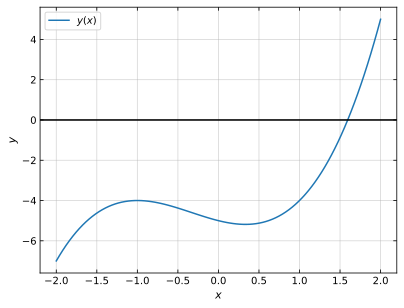

In [2]:
a = 1
b = 1
c = -1
d = -5
xs = torch.linspace(-2, 2, 100)
ys = a*xs**3 + b*xs**2 + c*xs + d

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.grid(alpha=0.5)
ax.plot(xs, ys, label=r'$y(x)$')
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex41_fig1.png')

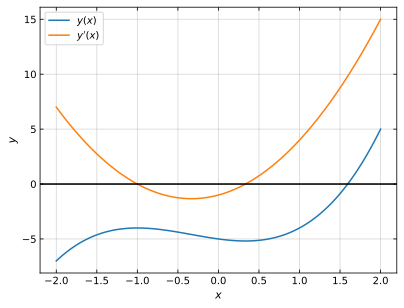

In [3]:
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = a*xs**3 + b*xs**2 + c*xs + d
dydxs = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs), create_graph=True)[0]

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.grid(alpha=0.5)
with torch.no_grad():
    ax.plot(xs, ys, label=r'$y(x)$')
    ax.plot(xs, dydxs, label=r"$y'(x)$")
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex41_fig2.png')

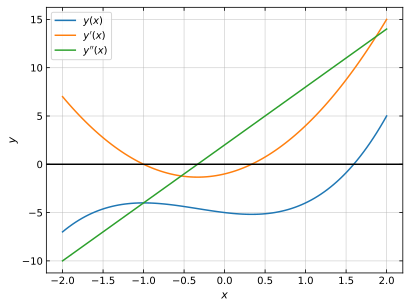

In [4]:
xs = torch.linspace(-2, 2, 100, requires_grad=True)
ys = a*xs**3 + b*xs**2 + c*xs + d
dydxs = torch.autograd.grad(ys, xs, grad_outputs=torch.ones_like(xs), create_graph=True)[0]
d2ydx2s = torch.autograd.grad(dydxs, xs, grad_outputs=torch.ones_like(xs))[0]

fig, ax = plt.subplots()
ax.set(xlabel=r'$x$', ylabel=r'$y$')
ax.grid(alpha=0.5)
with torch.no_grad():
    ax.plot(xs, ys, label=r'$y(x)$')
    ax.plot(xs, dydxs, label=r"$y'(x)$")
    ax.plot(xs, d2ydx2s, label=r"$y''(x)$")
ax.axhline(0, c='k')
ax.legend()

fig.savefig('ex41_fig3.png')